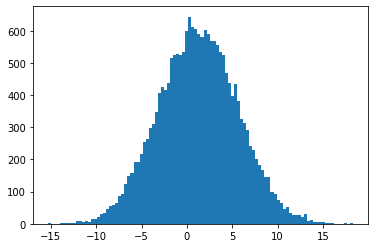

In [15]:
import numpy as np
import pandas as pd

n = 1000
t = 20
beta = np.array([-1,3]).reshape(2,1)

X = np.random.normal(0, 4, n*t).reshape(n*t,1)
D1 = np.random.binomial(1, 0.4,n).reshape(n,1)
Di = np.repeat(D1,t).reshape(n*t,1)
u = np.random.uniform(-1,1,n*t).reshape(n*t,1)

a = np.zeros((n,1))
a[D1 == 1] = np.random.normal(0,0.3,np.sum(D1==1))
a[D1 == 0] = np.random.normal(0,0.2,np.sum(D1==0))

Xa = np.c_[X,Di]
#Xa = np.array([X,Di]).reshape(n*t,2)
D = np.kron(np.eye(n), np.ones((t,1)))

Y = Xa @ beta + D @ a + u

import matplotlib.pyplot as plt 
# Visualización de la distribución de Y
plt.hist(Y, bins=100)
plt.show()

In [16]:
# P1
Xb = np.zeros((n*t*3)).reshape(n*t,3)
const = np.ones(n*t)
Xb[:,0] = const
Xb[:,[1,2]] = Xa

beta_ols = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ Y
res_ols = Y - Xb @ beta_ols
var_res = res_ols.T @ res_ols /(n*t - 2)
var_ols = var_res * np.linalg.inv(Xb.T @ Xb)

array([[-0.00491294],
       [-1.00072342],
       [ 3.0349691 ]])

In [ ]:
# P2
# X_W = (np.eye(n*t) - (D @ np.linalg.inv(D.T @ D) @ D.T))@ Xa

In [4]:
# P3 
aux = np.diag((Y - Xb @ beta_ols)[:,0])**2
res_EW = Xb.T @ aux @ Xb
var_EW = np.linalg.inv(Xb.T @ Xb) @ res_EW @ np.linalg.inv(Xb.T @ Xb)
print(var_EW)

diff = var_ols - var_EW
print(np.linalg.eig(diff)[0])

[[ 3.11202790e-05 -4.35118863e-08 -3.11204924e-05]
 [-4.35118863e-08  1.19977742e-06 -6.32346957e-09]
 [-3.11204924e-05 -6.32346957e-09  8.42553086e-05]]
[-1.91390637e-06  1.43361185e-06  8.01225682e-09]


In [5]:
# P4
res_M = res_ols.reshape(t,n)
res_t = res_M[:-1,:].reshape(n*(t-1),)
res_t_1 = res_M[1:,:].reshape(n*(t-1),)
phi_s = (np.sqrt(n*t)) * np.sum(res_t * res_t_1)/np.sum(res_t_1 * res_t_1)
phi_s


0.6059756129371365

In [7]:
res_ols

array([[ 0.19726265],
       [ 0.55351529],
       [ 0.14945398],
       ...,
       [ 0.4655043 ],
       [-1.0615206 ],
       [ 0.37817207]])

In [9]:
# P5 Basados en la forma que ud gener´o los datos y los supuestos de cada estimaci´on,
#¿debiera preferirse efectos fijos o efectos aleatorios?
aux_FE = (np.eye(n*t) - D @ np.linalg.inv(D.T @ D) @ D.T)
aux_FE

array([[ 0.95, -0.05, -0.05, ...,  0.  ,  0.  ,  0.  ],
       [-0.05,  0.95, -0.05, ...,  0.  ,  0.  ,  0.  ],
       [-0.05, -0.05,  0.95, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.95, -0.05, -0.05],
       [ 0.  ,  0.  ,  0.  , ..., -0.05,  0.95, -0.05],
       [ 0.  ,  0.  ,  0.  , ..., -0.05, -0.05,  0.95]])

In [10]:
# P6
#aux_FE = (np.eye(n*t) - D @ np.linalg.inv(D.T @ D) @ D.T)
X_FE = aux_FE @ Xa
Y_FE = aux_FE @ Y
beta_fe = np.linalg.inv(X_FE.T @ X_FE) @ X_FE.T @ Y_FE
print(beta_fe)


[[-9.99315176e-01]
 [ 6.38514959e+12]]


In [103]:
k = 0
l = t
X_mean = np.zeros(n*t*2).reshape(n*t,2)
Y_mean = np.zeros(n*t*2).reshape(n*t,2)
i2 = 0
for i in range(n):
    for j in range(t):
        X_mean[i2,:] = np.mean(Xa[k:l,:],1)
        Y_mean[i2,:] = np.mean(Y[k:l,:],1)
        k = k + 1
        l = l + t

ValueError: could not broadcast input array from shape (3,) into shape (2,)